# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [5]:
# Graded Task 1 here:
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
df = pd.read_csv(url)

df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [7]:
# Graded Task 2 here:
# Filtering super stores
super_stores = df[df['conversion'] == 1]

# Counting super stores by state
state_super_counts = super_stores['STRSTATE'].value_counts()

# Getting the 7th highest state
seventh_highest_state = state_super_counts.index[6]

# Counting total stores (super and regular) by city
city_store_counts = df['STRCITY'].value_counts()

# Getting the 5th highest city
fifth_highest_city = city_store_counts.index[4]

print(f"7th highest state for super stores: {seventh_highest_state}")
print(f"5th highest city for total stores: {fifth_highest_city}")

7th highest state for super stores: NC
5th highest city for total stores: Greenville


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [37]:
# Graded Task 3 here:
import pandas as pd

def cumulative_stores_by_state(df, state_abbrev):
    """
    This function calculates the cumulative number of Walmart stores opened over time for a given state.

    Parameters:
    df (pd.DataFrame): The Walmart dataset.
    state_abbrev (str): The state abbreviation ('AR' for Arkansas).

    Returns:
    pd.DataFrame: A DataFrame with: 'date' and 'cumsum'.
    """
    # Step 1: Given state
    state_data = df[df['STRSTATE'] == state_abbrev].copy()

    # Step 2: 'OPENDATE' column to a proper date format
    state_data['OPENDATE'] = pd.to_datetime(state_data['OPENDATE'], format='%m/%d/%y')

    # Step 3: Sorting the data by 'OPENDATE' 
    state_data = state_data.sort_values('OPENDATE')

    # Step 4: Calculating the cumulative sum of stores 
    state_data['cumsum'] = range(1, len(state_data) + 1)

    # Step 5: Result DataFrame 
    result = state_data[['OPENDATE', 'cumsum']].rename(columns={'OPENDATE': 'date'})

    return result

result = cumulative_stores_by_state(df, 'AR')
print(result)


         date  cumsum
12 1969-04-01       1
13 1969-11-01       2
26 1971-04-01       3
22 1971-06-01       4
30 1971-11-01       5
..        ...     ...
1  2064-08-01      77
2  2065-08-01      78
4  2067-10-01      79
3  2067-10-01      80
8  2068-03-01      81

[81 rows x 2 columns]


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

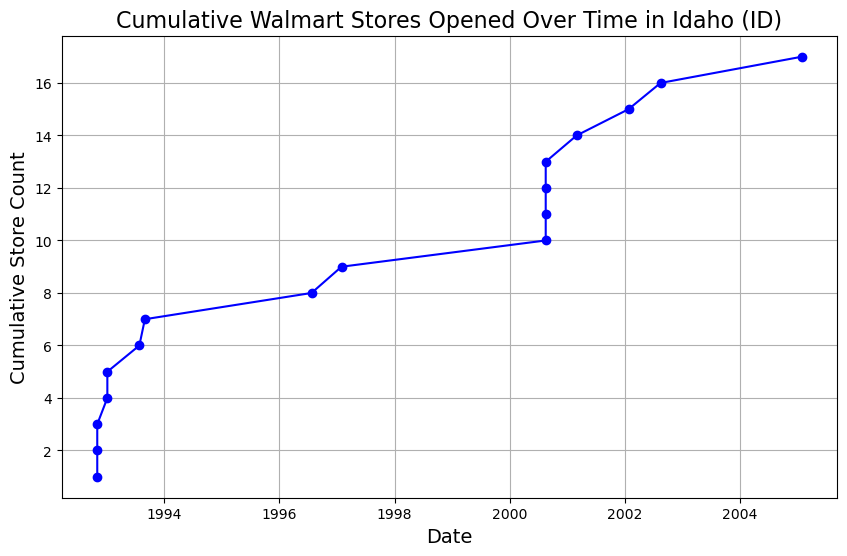

In [39]:
# Graded Task 4 here:
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
df = pd.read_csv(url)

# Get cumulative store data for Idaho (ID)
idaho_data = cumulative_stores_by_state(df, 'ID')

# Plot the time series using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(idaho_data['date'], idaho_data['cumsum'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Cumulative Walmart Stores Opened Over Time in Idaho (ID)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Store Count', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

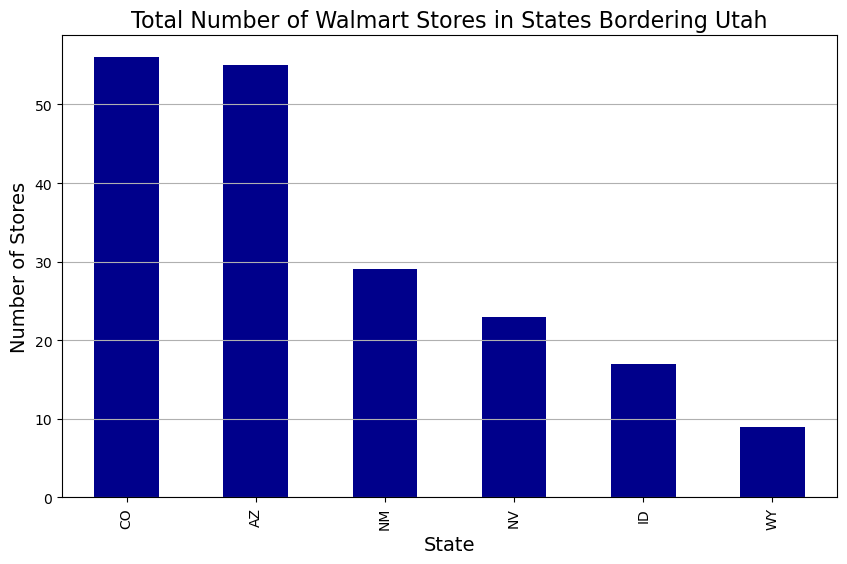

In [45]:
# Graded Task 5 here:
bordering_stores = df[df['STRSTATE'].isin(bordering_states)]

# Counting
state_counts = bordering_stores['STRSTATE'].value_counts()

# Plotting the bar chart using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size

# Creating the bar chart with dark blue bars
state_counts.plot(kind='bar', color='darkblue')
plt.title('Total Number of Walmart Stores in States Bordering Utah', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Stores', fontsize=14)
plt.grid(True, axis='y')

plt.show()